In [1]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
import seaborn as sns

In [2]:
# read in the entire dataset
master = pd.read_excel('..\Data Cleanup\cleaned_data.xlsx', sheet_name = 'master')

master = master[(master['EffMeas'] == 'LR') & (master['TotalApp'] == 1)]

In [3]:
dist_names = ['beta',
              'gamma',
              'lognorm',
              'pearson3',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max',
              'truncnorm',
              'truncexpon']

In [4]:
# Data subsets that need to be fit with distributions
physical = master[(master['AppMethod'] == 'physical') & (master['IndoorMisc'] == 0)]

fumigationIndoorCarpet = master[(master['AppMethod'] == 'fumigation') & (master['IndoorCarpet'] == 1)]

fumigationIndoorCeilings = master[(master['AppMethod'] == 'fumigation') & (master['IndoorCeilings'] == 1)]

fumigationIndoorMisc = master[(master['AppMethod'] == 'fumigation') & (master['IndoorMisc'] == 1)]

fumigationUndergroundCeilings = master[(master['AppMethod'] == 'fumigation') & (master['UndergroundCeilings'] == 1)]

fumigationUndergroundCarpet = master[(master['AppMethod'] == 'fumigation') & (master['UndergroundCarpet'] == 1)]

liquidSprayRoofing = master[(master['AppMethod'] == 'liquid spray') & (master['Roofing'] == 1)]

gel = master[(master['AppMethod'] == 'gel')]

aerosol = master[(master['AppMethod'] == 'aerosol')]

fogging = master[(master['AppMethod'] == 'fogging')]

In [5]:
params = [
    (physical, "Physical"),
    (fumigationIndoorCarpet, "Fumigation and IndoorCarpet"),
    (fumigationIndoorCeilings, "Fumigation and IndoorCeilings"),
    (fumigationIndoorMisc, "Fumigation and IndoorMisc"),
    (fumigationUndergroundCeilings, "Fumigation and UndergroundCeilings"),
    (fumigationUndergroundCarpet, "Fumigation and UndergroundCarpet"),
    (liquidSprayRoofing, "Liquid Spray and Roofing"),
    (gel, "Gel"),
    (aerosol, "Aerosol"),
    (fogging, "Fogging")
]

C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5823: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5823: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


      DistName          AIC          LLH
0   truncexpon  1298.647071  -646.256443
1    truncnorm  1278.947884  -635.358557
2  weibull_max  2317.856728 -1156.896517
3  weibull_min  1198.054542  -596.995424
4      uniform  1374.218901  -685.077604
5       triang  1185.125955  -589.495885
6     pearson3  1183.530968  -588.698392
7      lognorm  1173.008599  -584.472452
8        gamma  1181.460477  -588.698391
9         beta  1181.492547  -588.714426
lognorm


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


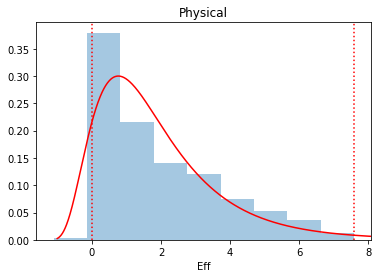

      DistName          AIC         LLH
0   truncexpon  1256.065731 -624.952713
1    truncnorm          inf        -inf
2  weibull_max  1442.286910 -719.105432
3  weibull_min  1216.127729 -606.025842
4      uniform  1166.457236 -581.190595
5       triang  1146.843820 -570.341757
6     pearson3  1195.071696 -594.455695
7      lognorm  1243.069911 -619.496933
8        gamma  1247.313355 -621.618655
9         beta  1163.189916 -579.556935
triang


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


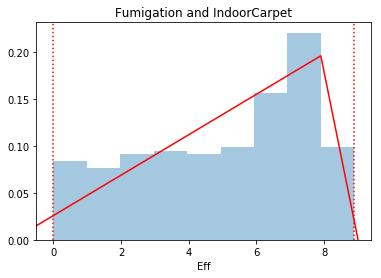

      DistName          AIC         LLH
0   truncexpon  1017.475343 -505.644751
1    truncnorm          inf        -inf
2  weibull_max  1147.985290 -571.948592
3  weibull_min  1337.616044 -666.763969
4      uniform   959.479775 -477.695835
5       triang   902.276622 -448.045391
6     pearson3   931.159685 -462.486922
7      lognorm  1005.648846 -500.780370
8        gamma  1012.729152 -504.320523
9         beta   979.115664 -487.513779
triang


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


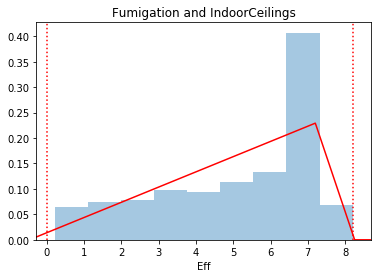

      DistName         AIC         LLH
0   truncexpon  587.835362 -290.741210
1    truncnorm         inf        -inf
2  weibull_max  509.894434 -252.863884
3  weibull_min  511.485592 -253.659463
4      uniform  536.061210 -265.947272
5       triang  498.718235 -246.182647
6     pearson3  506.280613 -249.963836
7      lognorm  532.612849 -264.223091
8        gamma  536.464392 -266.148863
9         beta  461.988686 -228.911010
beta


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


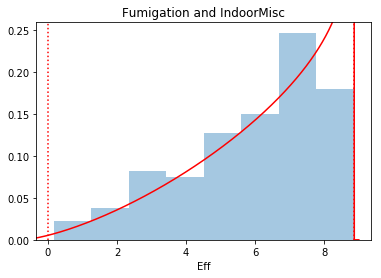

      DistName          AIC         LLH
0   truncexpon  1017.475343 -505.644751
1    truncnorm          inf        -inf
2  weibull_max  1147.985290 -571.948592
3  weibull_min  1337.616044 -666.763969
4      uniform   959.479775 -477.695835
5       triang   902.276622 -448.045391
6     pearson3   931.159685 -462.486922
7      lognorm  1005.648846 -500.780370
8        gamma  1012.729152 -504.320523
9         beta   979.115664 -487.513779
triang


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


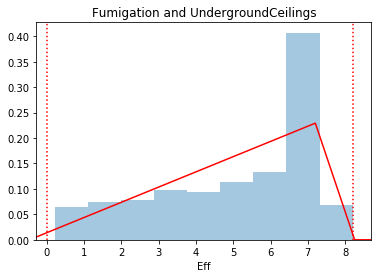

      DistName          AIC         LLH
0   truncexpon  1256.065731 -624.952713
1    truncnorm          inf        -inf
2  weibull_max  1442.286910 -719.105432
3  weibull_min  1216.127729 -606.025842
4      uniform  1166.457236 -581.190595
5       triang  1146.843820 -570.341757
6     pearson3  1195.071696 -594.455695
7      lognorm  1243.069911 -619.496933
8        gamma  1247.313355 -621.618655
9         beta  1163.189916 -579.556935
triang


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


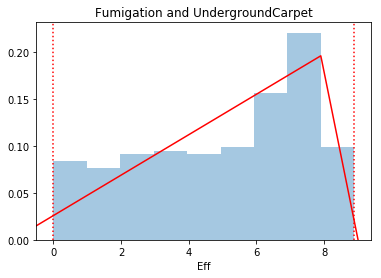

      DistName         AIC         LLH
0   truncexpon  277.435629 -135.384481
1    truncnorm         inf        -inf
2  weibull_max  431.331470 -213.509485
3  weibull_min  291.350920 -143.519210
4      uniform  284.254481 -139.970991
5       triang  276.663444 -134.998389
6     pearson3  289.490607 -141.411970
7      lognorm  295.028545 -145.358023
8        gamma  287.136440 -141.411970
9         beta  273.549061 -134.618281
beta


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


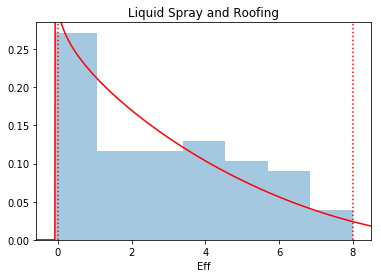

      DistName        AIC        LLH
0   truncexpon  52.419158 -19.009579
1    truncnorm        inf       -inf
2  weibull_max  28.511997 -10.589332
3  weibull_min  10.586875  -1.626771
4      uniform  43.118141 -17.892404
5       triang  54.917612 -20.258806
6     pearson3  54.639492 -20.119746
7      lognorm  47.824233 -20.245450
8        gamma  47.887713 -20.277190
9         beta  27.857496 -10.262081
weibull_min


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


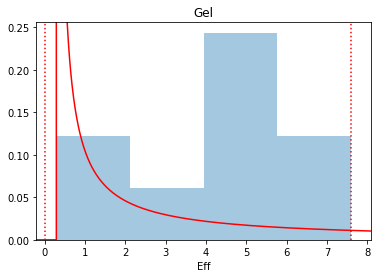

      DistName        AIC        LLH
0   truncexpon  61.814522 -25.807261
1    truncnorm        inf       -inf
2  weibull_max  51.328661 -22.755239
3  weibull_min  53.977392 -24.079605
4      uniform  55.516848 -24.849333
5       triang  72.314477 -31.057239
6     pearson3  55.267353 -22.533676
7      lognorm  57.669252 -25.925535
8        gamma  22.196378  -8.189098
9         beta  19.695473  -6.938645
beta


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


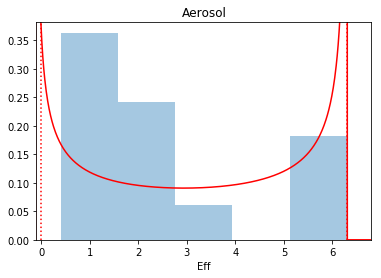

      DistName        AIC        LLH
0   truncexpon  40.838470 -15.669235
1    truncnorm        inf       -inf
2  weibull_max  25.688495 -10.075017
3  weibull_min  53.450534 -23.956036
4      uniform  32.052120 -13.256829
5       triang  30.462242 -10.481121
6     pearson3  29.886683 -10.193342
7      lognorm  32.207924 -13.334731
8        gamma  33.038897 -13.750218
9         beta  22.344405  -8.402972
beta


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


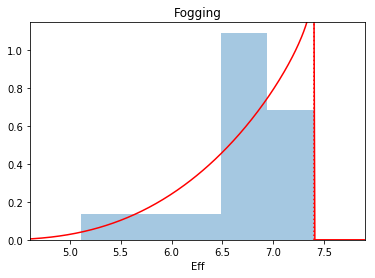

In [6]:
def distributionFitting(data, title):
    
    # Store efficacy data nicely into y variable
    y = data.Eff.dropna().tolist()
    x = np.linspace(-1, 9, num=1000)
    size = len(y)
    
    # Create the dataframe that will hold the different distribution names and their corresponding AIC
    distFits = pd.DataFrame(columns = ['DistName', 'AIC', 'LLH'])

    # Fit each distribution and calculate and store the AIC
    for distName in dist_names:
        dist = getattr(scipy.stats, distName)

        params = dist.fit(y)

        LLH = dist.logpdf(y,*params).sum()

        if distName == 'truncexpon':
            A = -2*LLH + 2*3
            AIC = A + ((((2*3)**2) + 2*3)/(len(y) - 3 - 1))
        elif distName == 'truncnorm':
            A = -2*LLH + 2*4
            AIC = A + ((((2*4)**2) + 2*4)/(len(y) - 4 - 1))
        elif distName == 'uniform':
            A = -2*LLH + 2*2
            AIC = A + ((((2*2)**2) + 2*2)/(len(y) - 2 - 1))
        elif distName == 'triang':
            A = -2*LLH + 2*3
            AIC = A + ((((2*3)**2) + 2*3)/(len(y) - 3 - 1))
        elif distName == 'pearson3':
            A = -2*LLH + 2*3
            AIC = A + ((((2*3)**2) + 2*3)/(len(y) - 3 - 1))
        elif distName == 'lognorm':
            A = -2*LLH + 2*2
            AIC = A + ((((2*2)**2) + 2*2)/(len(y) - 2 - 1))
        elif distName == 'gamma':
            A = -2*LLH + 2*2
            AIC = A + ((((2*2)**2) + 2*2)/(len(y) - 2 - 1))
        elif distName == 'beta':
            A = -2*LLH + 2*2
            AIC = A + ((((2*2)**2) + 2*2)/(len(y) - 2 - 1))
        else:
            A = -2*LLH + 2*2
            AIC = A + ((((2*2)**2) + 2*2)/(len(y) - 2 - 1))

        rowData = [[distName, AIC, LLH]]
        dat = pd.DataFrame(rowData, columns = ['DistName', 'AIC', 'LLH'])

        distFits = pd.concat([dat, distFits], ignore_index=True)

    # Determine the best fit based on the AICs
    bestAIC = distFits.AIC.min()
    index = distFits.index.get_loc(distFits.index[distFits['AIC'] == bestAIC][0])
    bestDist = distFits.at[index, 'DistName']

    print(distFits)

    print(bestDist)
    
    # Plot the distribution
    fig, ax = plt.subplots()
    
    binSize = round(1 + (3.322 * math.log10(len(y))))
    sns.distplot(data.Eff.dropna(), norm_hist=True, kde_kws={"linestyle":""}, bins=binSize)

    dist = getattr(scipy.stats, bestDist)
    param = dist.fit(y)

    # Get line for each distribution (and scale to match observed data)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])

    plt.xlim(data.Eff.min() - 0.5, data.Eff.max() + 0.5)
    
    # Add the line to the plot
    plt.plot(x, pdf_fitted, color='red')
    plt.title(title)

    ax.axvline(0, linestyle=":", color="red")
    ax.axvline(data.Eff.max(), linestyle=":", color="red")
    
    plt.show()
    
for p in params:
    distributionFitting(*p)

C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


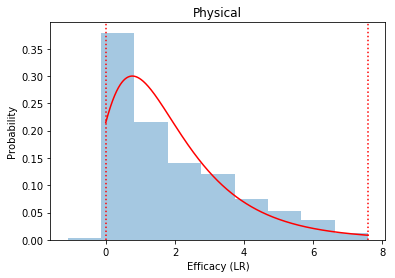

317


,params
mu1,1.062142
sigma1,0.528706


In [7]:
# Plot the distribution
fig, ax = plt.subplots()

y = physical.Eff.dropna().tolist()
x = np.linspace(0, physical.Eff.max(), num=1000)
size = len(y)
    
binSize = round(1 + (3.322 * math.log10(len(y))))
sns.distplot(physical.Eff.dropna(), norm_hist=True, kde_kws={"linestyle":""}, bins=binSize)

param = stats.lognorm.fit(y)

# Get line for each distribution (and scale to match observed data)
pdf_fitted = stats.lognorm.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])

plt.xlim(physical.Eff.min() - 0.5, physical.Eff.max() + 0.5)
#plt.ylim(0, 1.5)
    
# Add the line to the plot
plt.plot(x, pdf_fitted, color='red')

ax.axvline(0, linestyle=":", color="red")
ax.axvline(physical.Eff.max(), linestyle=":", color="red")
ax.set(xlabel='Efficacy (LR)', ylabel='Probability', title='Physical')

plt.show()

parameters = pd.DataFrame({'params': [np.log(param[2]), param[0]]}, index=['mu1', 'sigma1'])

print(len(y))

parameters

C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


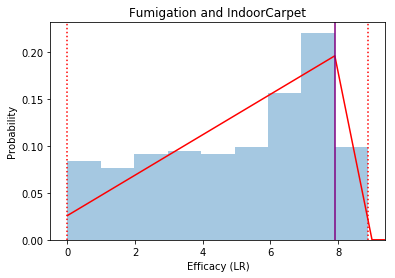

266


,params
a,-1.197903
b,8.999129
c,7.900000


In [40]:
# Plot the distribution
fig, ax = plt.subplots()

y = fumigationIndoorCarpet.Eff.dropna().tolist()
x = np.linspace(0, fumigationIndoorCarpet.Eff.max()+1, num=1000)
size = len(y)
  
binSize = round(1 + (3.322 * math.log10(len(y))))
sns.distplot(fumigationIndoorCarpet.Eff.dropna(), norm_hist=True, kde_kws={"linestyle":""}, bins=binSize)

param = stats.triang.fit(y)

shape = param[0]
loc = param[1]
scale = param[2]
c = loc + (shape * scale)

# Get line for each distribution (and scale to match observed data)
pdf_fitted = stats.triang.pdf(x, shape, loc=loc, scale=scale)

plt.xlim(fumigationIndoorCarpet.Eff.min() - 0.5, fumigationIndoorCarpet.Eff.max() + 0.5)
#plt.ylim(0, 0.4)
    
# Add the line to the plot
plt.plot(x, pdf_fitted, color='red')

ax.axvline(0, linestyle=":", color="red")
ax.axvline(c, color='purple')
ax.axvline(fumigationIndoorCarpet.Eff.max(), linestyle=":", color="red")
ax.set(xlabel='Efficacy (LR)', ylabel='Probability', title='Fumigation and IndoorCarpet')

plt.show()

parameters = pd.DataFrame({'params': [loc, loc + scale, c]}, index=['a', 'b', 'c'])

print(len(y))

parameters

C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


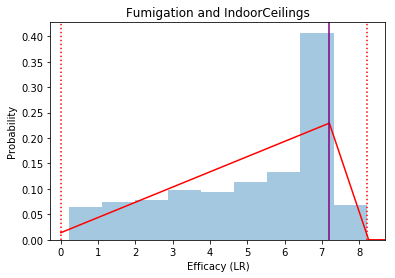

230


,params
a,-0.468984
b,8.254794
c,7.200000


In [39]:
# Plot the distribution
fig, ax = plt.subplots()

y = fumigationIndoorCeilings.Eff.dropna().tolist()
x = np.linspace(0, fumigationIndoorCeilings.Eff.max()+1, num=1000)
size = len(y)
  
binSize = round(1 + (3.322 * math.log10(len(y))))
sns.distplot(fumigationIndoorCeilings.Eff.dropna(), norm_hist=True, kde_kws={"linestyle":""}, bins=binSize)

param = stats.triang.fit(y)

shape = param[0]
loc = param[1]
scale = param[2]
c = loc + (shape * scale)

# Get line for each distribution (and scale to match observed data)
pdf_fitted = stats.triang.pdf(x, shape, loc=loc, scale=scale)

plt.xlim(fumigationIndoorCeilings.Eff.min() - 0.5, fumigationIndoorCeilings.Eff.max() + 0.5)
#plt.ylim(0, 0.4)
    
# Add the line to the plot
plt.plot(x, pdf_fitted, color='red')

ax.axvline(0, linestyle=":", color="red")
ax.axvline(c, color='purple')
ax.axvline(fumigationIndoorCeilings.Eff.max(), linestyle=":", color="red")
ax.set(xlabel='Efficacy (LR)', ylabel='Probability', title='Fumigation and IndoorCeilings')

plt.show()

parameters = pd.DataFrame({'params': [loc, loc + scale, c]}, index=['a', 'b', 'c'])

print(len(y))

parameters

C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


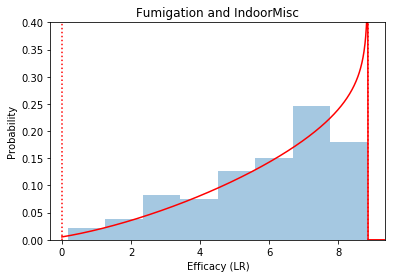

123


,params
alpha,2.415362
beta,0.875003


In [41]:
# Plot the distribution
fig, ax = plt.subplots()

y = fumigationIndoorMisc.Eff.dropna().tolist()
x = np.linspace(0, fumigationIndoorMisc.Eff.max()+1, num=1000)
size = len(y)
    
binSize = round(1 + (3.322 * math.log10(len(y))))
sns.distplot(fumigationIndoorMisc.Eff.dropna(), norm_hist=True, kde_kws={"linestyle":""}, bins=binSize)

param = stats.beta.fit(y)

# Get line for each distribution (and scale to match observed data)
pdf_fitted = stats.beta.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])

plt.xlim(fumigationIndoorMisc.Eff.min() - 0.5, fumigationIndoorMisc.Eff.max() + 0.5)
plt.ylim(0, 0.4)
    
# Add the line to the plot
plt.plot(x, pdf_fitted, color='red')

ax.axvline(0, linestyle=":", color="red")
ax.axvline(fumigationIndoorMisc.Eff.max(), linestyle=":", color="red")
ax.set(xlabel='Efficacy (LR)', ylabel='Probability', title='Fumigation and IndoorMisc')

plt.show()

parameters = pd.DataFrame({'params': [param[0], param[1]]}, index=['alpha', 'beta'])

print(len(y))

parameters

C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


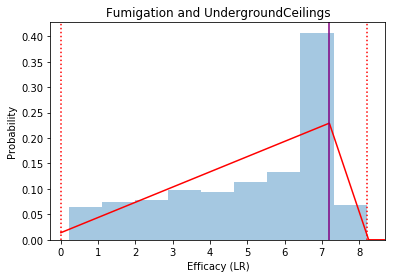

230


,params
a,-0.468984
b,8.254794
c,7.200000


In [42]:
# Plot the distribution
fig, ax = plt.subplots()

y = fumigationUndergroundCeilings.Eff.dropna().tolist()
x = np.linspace(0, fumigationUndergroundCeilings.Eff.max()+1, num=1000)
size = len(y)
  
binSize = round(1 + (3.322 * math.log10(len(y))))
sns.distplot(fumigationUndergroundCeilings.Eff.dropna(), norm_hist=True, kde_kws={"linestyle":""}, bins=binSize)

param = stats.triang.fit(y)

shape = param[0]
loc = param[1]
scale = param[2]
c = loc + (shape * scale)

# Get line for each distribution (and scale to match observed data)
pdf_fitted = stats.triang.pdf(x, shape, loc=loc, scale=scale)

plt.xlim(fumigationUndergroundCeilings.Eff.min() - 0.5, fumigationUndergroundCeilings.Eff.max() + 0.5)
#plt.ylim(0, 0.4)
    
# Add the line to the plot
plt.plot(x, pdf_fitted, color='red')

ax.axvline(0, linestyle=":", color="red")
ax.axvline(c, color='purple')
ax.axvline(fumigationUndergroundCeilings.Eff.max(), linestyle=":", color="red")
ax.set(xlabel='Efficacy (LR)', ylabel='Probability', title='Fumigation and UndergroundCeilings')

plt.show()

parameters = pd.DataFrame({'params': [loc, loc + scale, c]}, index=['a', 'b', 'c'])

print(len(y))

parameters

C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


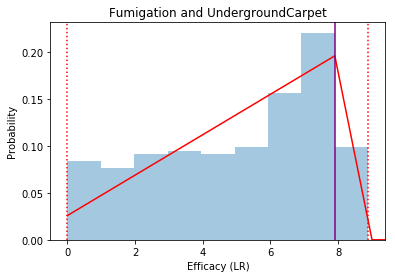

266


,params
a,-1.197903
b,8.999129
c,7.900000


In [43]:
# Plot the distribution
fig, ax = plt.subplots()

y = fumigationUndergroundCarpet.Eff.dropna().tolist()
x = np.linspace(0, fumigationUndergroundCarpet.Eff.max()+1, num=1000)
size = len(y)
  
binSize = round(1 + (3.322 * math.log10(len(y))))
sns.distplot(fumigationUndergroundCarpet.Eff.dropna(), norm_hist=True, kde_kws={"linestyle":""}, bins=binSize)

param = stats.triang.fit(y)

shape = param[0]
loc = param[1]
scale = param[2]
c = loc + (shape * scale)

# Get line for each distribution (and scale to match observed data)
pdf_fitted = stats.triang.pdf(x, shape, loc=loc, scale=scale)

plt.xlim(fumigationUndergroundCarpet.Eff.min() - 0.5, fumigationUndergroundCarpet.Eff.max() + 0.5)
#plt.ylim(0, 0.4)
    
# Add the line to the plot
plt.plot(x, pdf_fitted, color='red')

ax.axvline(0, linestyle=":", color="red")
ax.axvline(c, color='purple')
ax.axvline(fumigationUndergroundCarpet.Eff.max(), linestyle=":", color="red")
ax.set(xlabel='Efficacy (LR)', ylabel='Probability', title='Fumigation and UndergroundCarpet')

plt.show()

parameters = pd.DataFrame({'params': [loc, loc + scale, c]}, index=['a', 'b', 'c'])

print(len(y))

parameters

In [ ]:
# Plot the distribution
fig, ax = plt.subplots()

y = liquidSprayRoofing.Eff.dropna().tolist()
x = np.linspace(0, liquidSprayRoofing.Eff.max()+1, num=1000)
size = len(y)

binSize = round(1 + (3.322 * math.log10(len(y))))
sns.distplot(liquidSprayRoofing.Eff.dropna(), norm_hist=True, kde_kws={"linestyle":""}, bins=binSize)

param = stats.beta.fit(y)

print(param)

# Get line for each distribution (and scale to match observed data)
pdf_fitted = (stats.beta.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]))

plt.xlim(liquidSprayRoofing.Eff.min() - 0.5, liquidSprayRoofing.Eff.max() + 0.5)
plt.ylim(0, 0.35)
    
# Add the line to the plot
plt.plot(x, pdf_fitted, color='red')

ax.axvline(0, linestyle=":", color="red")
ax.axvline(liquidSprayRoofing.Eff.max(), linestyle=":", color="red")
ax.set(xlabel='Efficacy (LR)', ylabel='Probability', title='Liquid Spray and Roofing')

plt.show()

parameters = pd.DataFrame({'params': [param[0], param[1]]}, index=['alpha', 'beta'])

print(len(y))

parameters

In [ ]:
# Plot the distribution
fig, ax = plt.subplots()

y = gel.Eff.dropna().tolist()
x = np.linspace(0, gel.Eff.max(), num=1000)
size = len(y)

binSize = round(1 + (3.322 * math.log10(len(y))))
sns.distplot(gel.Eff.dropna(), norm_hist=True, kde_kws={"linestyle":""}, bins=binSize)

param = stats.weibull_min.fit(y)

# Get line for each distribution (and scale to match observed data)
pdf_fitted = (stats.weibull_min.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]))

plt.xlim(gel.Eff.min() - 0.5, gel.Eff.max() + 0.5)
plt.ylim(0, 1)
    
# Add the line to the plot
plt.plot(x, pdf_fitted, color='red')

ax.axvline(0, linestyle=":", color="red")
ax.axvline(gel.Eff.max(), linestyle=":", color="red")
ax.set(xlabel='Efficacy (LR)', ylabel='Probability', title='Gel')

plt.show()

parameters = pd.DataFrame({'params': [param[0], param[2]]}, index=['k', 'lambda'])

print(len(y))

parameters

In [ ]:
# Plot the distribution
fig, ax = plt.subplots()

y = aerosol.Eff.dropna().tolist()
x = np.linspace(0, aerosol.Eff.max()+1, num=1000)
size = len(y)

binSize = round(1 + (3.322 * math.log10(len(y))))
sns.distplot(aerosol.Eff.dropna(), norm_hist=True, kde_kws={"linestyle":""}, bins=binSize)

param = stats.beta.fit(y)

# Get line for each distribution (and scale to match observed data)
pdf_fitted = (stats.beta.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]))

plt.xlim(aerosol.Eff.min() - 0.5, aerosol.Eff.max() + 0.5)
plt.ylim(0, 0.8)
    
# Add the line to the plot
plt.plot(x, pdf_fitted, color='red')

ax.axvline(0, linestyle=":", color="red")
ax.axvline(aerosol.Eff.max(), linestyle=":", color="red")
ax.set(xlabel='Efficacy (LR)', ylabel='Probability', title='Aerosol')

plt.show()

parameters = pd.DataFrame({'params': [param[0], param[1]]}, index=['alpha', 'beta'])

print(len(y))

parameters

In [ ]:
# Plot the distribution
fig, ax = plt.subplots()

y = fogging.Eff.dropna().tolist()
x = np.linspace(0, fogging.Eff.max()+1, num=1000)
size = len(y)

binSize = round(1 + (3.322 * math.log10(len(y))))
sns.distplot(fogging.Eff.dropna(), norm_hist=True, kde_kws={"linestyle":""}, bins=binSize)

param = stats.beta.fit(y)

# Get line for each distribution (and scale to match observed data)
pdf_fitted = (stats.beta.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]))

plt.xlim(fogging.Eff.min() - 0.5, fogging.Eff.max() + 0.5)
plt.ylim(0, 1.5)
    
# Add the line to the plot
plt.plot(x, pdf_fitted, color='red')

ax.axvline(0, linestyle=":", color="red")
ax.axvline(fogging.Eff.max(), linestyle=":", color="red")
ax.set(xlabel='Efficacy (LR)', ylabel='Probability', title='Fogging')

plt.show()

parameters = pd.DataFrame({'params': [param[0], param[1]]}, index=['alpha', 'beta'])

print(len(y))

parameters